# Verifica sommativa Machine Learning - classification

Prendere in considerazione i dati presenti al link: https://archive.ics.uci.edu/ml/datasets/Wilt

Leggere con attenzione di che cosa si tratta. Realizzare poi un notebook di Python che permetta di creare un modello di classificazione di queste informazioni utilizzando i tre algoritmi di classificazione visti. Per ogni algoritmo, trovare il valore del paramentro (se possibile) che meglio ottimizza i risultati, determinando il metodo migliore. Prestare attenzione al fatto che il test set e il training set sono presenti in due file csv diversi e sono quelli i campioni che devono essere utilizzati per costruire e testare i modelli. Utilizzare poi tutti e tre i metodi per stabilire la classe di appartenenza del seguente campione e vedere quale metodo ha classificato correttamente.

`125.0748032,254.8125,147.5,388.25,20.22442444` (il campione appartiene alla classe w)


Al termine, inserire nel notebook una breve valutazione dei tre metodi e del risultato

- [x] **KNN**
  - [x] Acc Migliore
  - [x] Test (Non passato)
- [x] **Decision Tree**
  - [x] Acc Migliore
  - [x] Test (Non passato)
- [x] **Random Forest**
  - [x] Acc Migliore
  - [x] Test (Non passato)
- [x] Creare rapporto
  - [x] Scrivere valutazione dei tre metodi

#### Rapporto
Il miglior algoritmo in qualita' di precisione e' KNN con una *accuracy* dell'81%, a seguire l'algoritmo Random Forest e Decision Tree con una accuracy rispettivamente al 79% e al 77%.<br>
Nessuno dei tre algoritmi e' riuscito ad individuare la classe corretta (w) del campione dato*.

\*Riga 21 [testing.csv](./Data/testing.csv:21)

In [166]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [167]:
import pandas as pd

training = pd.read_csv('./Data/training.csv')
test = pd.read_csv('./Data/testing.csv')

In [168]:
X_train=training.to_numpy()[:,1:]
y_train=training.to_numpy()[:,0]

import collections
collections.Counter(y_train)

Counter({'w': 74, 'n': 4265})

In [169]:
X_test=test.to_numpy()[:,1:]
y_test=test.to_numpy()[:,0]

import collections
collections.Counter(y_test)

Counter({'n': 313, 'w': 187})

## KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

predict = neigh.predict(X_test)

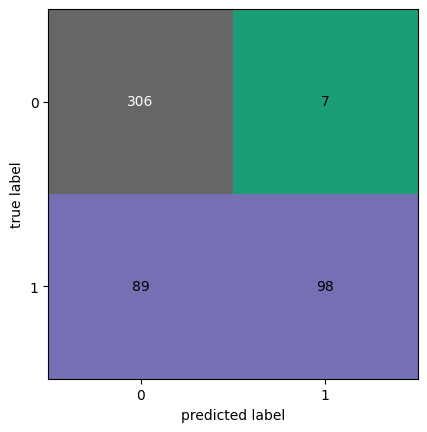

In [171]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [172]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           n       0.77      0.98      0.86       313
           w       0.93      0.52      0.67       187

    accuracy                           0.81       500
   macro avg       0.85      0.75      0.77       500
weighted avg       0.83      0.81      0.79       500



#### Calcolo miglior *accuracy*

In [173]:
f1s = []
accs = []

for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    predict = neigh.predict(X_test)
    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

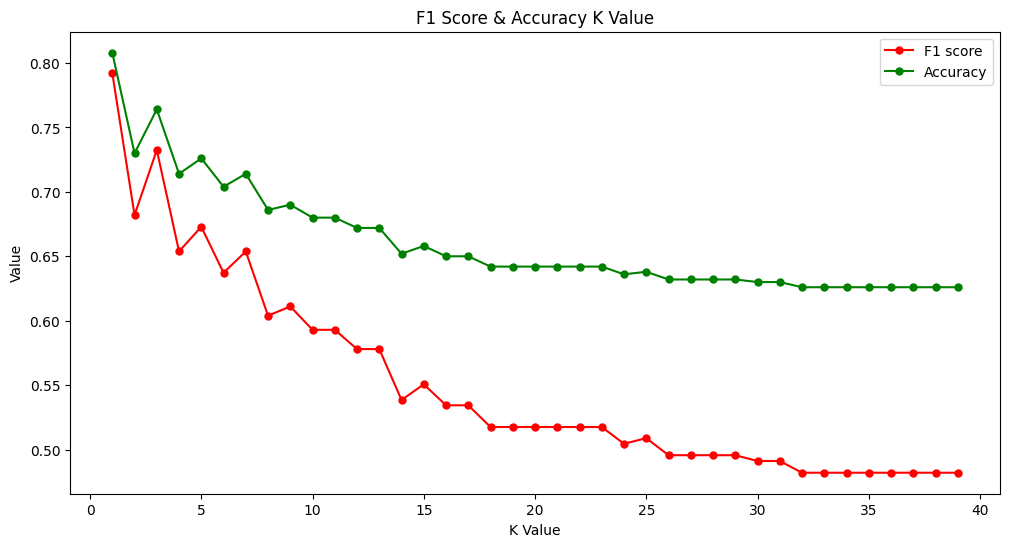

In [174]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 40), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Value')

#### Test

In [175]:
tree = [[125.0748032,254.8125,147.5,388.25,20.22442444]]
predict = neigh.predict(tree)
predict

array(['n'], dtype=object)

## Decision Tree

In [176]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=30, max_leaf_nodes=10, min_samples_leaf=4)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)

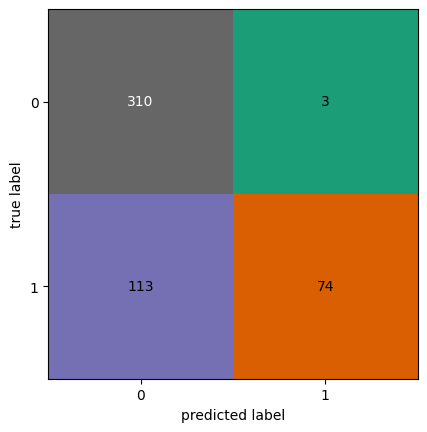

In [177]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [178]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           n       0.73      0.99      0.84       313
           w       0.96      0.40      0.56       187

    accuracy                           0.77       500
   macro avg       0.85      0.69      0.70       500
weighted avg       0.82      0.77      0.74       500



#### Calcolo miglior *accuracy*
Dopo aver modificato un po' di parametri la miglior *accuracy* trovata e' del 77%

#### Test

In [179]:
tree = [[125.0748032,254.8125,147.5,388.25,20.22442444]]
predict = tree_clf.predict(tree)
predict

array(['n'], dtype=object)

## Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=57)
rfc.fit(X_train, y_train)

predict = rfc.predict(X_test)

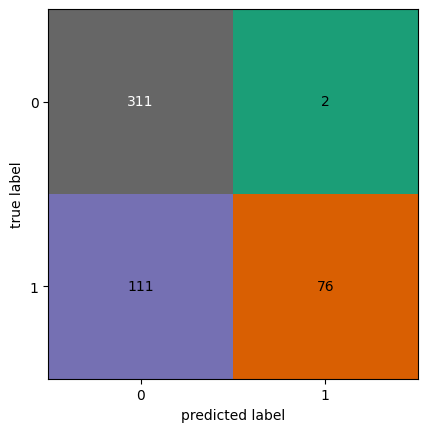

In [181]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [182]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           n       0.74      0.99      0.85       313
           w       0.97      0.41      0.57       187

    accuracy                           0.77       500
   macro avg       0.86      0.70      0.71       500
weighted avg       0.83      0.77      0.74       500



#### Calcolo miglior *accuracy*

In [ ]:
f1s = []
accs = []

for i in range(100, 600):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predict = rfc.predict(X_test)

    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

In [183]:
f1s = []
accs = []

for i in range(30, 101):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predict = rfc.predict(X_test)

    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

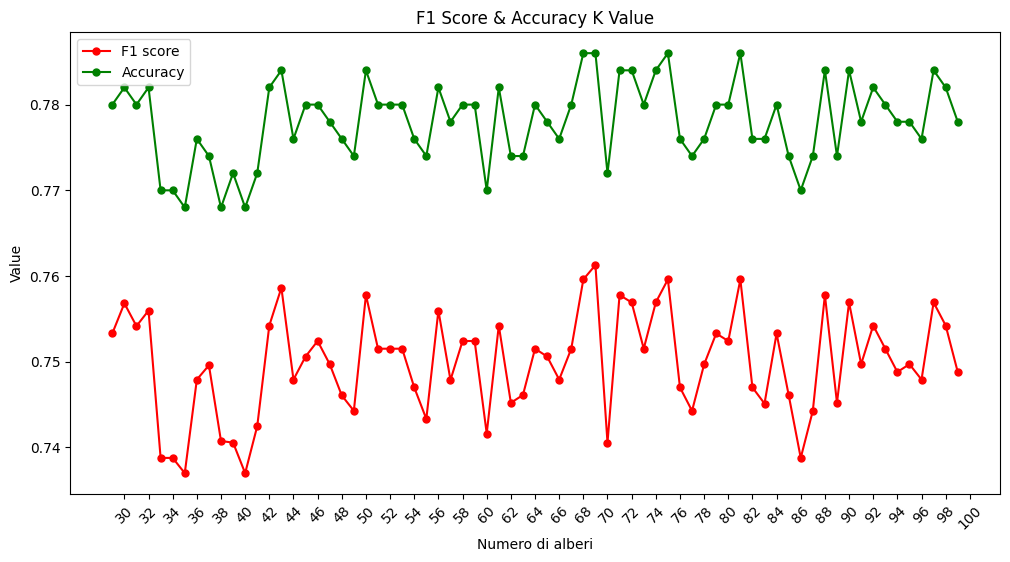

In [184]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 72), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 72), accs, color='green', marker='o', markersize=5)

plt.xticks(list(filter(lambda x: x%2==0 , range(1, 73))), list(filter(lambda x: x%2==0 ,range(30, 101))), rotation = 45)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('Numero di alberi')
plt.ylabel('Value')

#### Test

In [185]:
tree = [[125.0748032,254.8125,147.5,388.25,20.22442444]]
predict = rfc.predict(tree)
predict

array(['n'], dtype=object)